# Life Expectancy and GDP Project

## 1. Introduction

The purpose of this project is to analyze and interpert any relation between a countries life expectancy and their gross domestic product (GDP). The dataset in question is data from the World Health Organization (WHO) for the years 2000-2015 inclusive. The data contains life expectancy in years and GDP for a selection of countries.

### 1.1 The Data

The dataset, `all_data.csv` contains the previously mentioned data for the following countries:

- Chile
- China
- Germany
- Mexico
- United States
- Zimbabwe

There are 16 datapoints for each country, giving the dataset a total of 96 datapoints.

In [1]:
import pandas as pd

le_gdp = pd.read_csv("all_data.csv")
le_gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The GDP column is a bit cumbersome with the scientific notation. I will transform the column to be in units of billions.

In [2]:
gdp_unit_change_lambda = lambda gdp: float(gdp) / 1000000000

le_gdp["GDP"] = le_gdp["GDP"].apply(gdp_unit_change_lambda)
le_gdp.rename(columns = {"Country": "country", "Year": "year", "Life expectancy at birth (years)": "le_years", "GDP": "gdp_billions"}, inplace = True)
le_gdp.head()

,country,year,le_years,gdp_billions
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


## 2. Exploratory Data Analysis

### 2.1 Life Expectancy

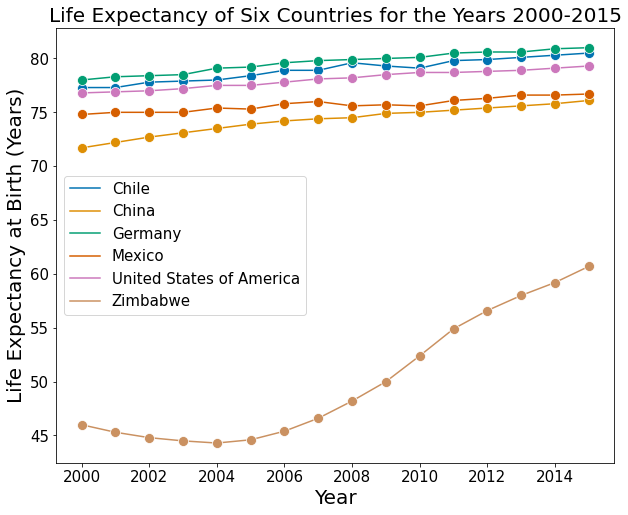

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.lineplot(x = "year",
             y = "le_years",
             hue = "country",
             data = le_gdp,
             marker = "o",
             markersize = 10,
             palette = "colorblind")
plt.xlabel("Year", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Life Expectancy at Birth (Years)", fontsize = 20)
plt.title("Life Expectancy of Six Countries for the Years 2000-2015", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

The line plot above shows that for most countries, the increase in life expectancy at birth year-over-year is relatively constant. In other words, the rate at which life expectancy at birth is increasing every year for all countries in the dataset, excluding Zimbabwe, is constant.

Zimbabwe, on the other hand, is very unique in this dataset. It is the only country with a downward trend in life exxpectancy lasting longer than two years. It also very clearly has the sharpest rise in life expectancy post 2004.

Other interesting facts include Germany having the largest life expectancy each year and Chile having the second largest.

### 2.2 GDP

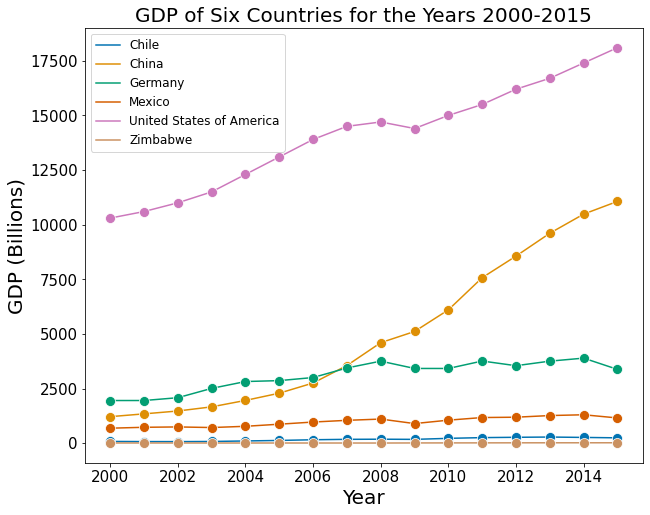

In [4]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = "year",
             y = "gdp_billions",
             hue = "country",
             data = le_gdp,
             marker = "o",
             markersize = 10,
             palette = "colorblind")
plt.xlabel("Year", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("GDP (Billions)", fontsize = 20)
plt.title("GDP of Six Countries for the Years 2000-2015", fontsize = 20)
plt.legend(fontsize = 12)
plt.show()

The lineplot above shows that the U.S. has the largest GDP for every year in question and China is on the rise. It is difficult to tell how the smaller GDP countries are changing over the years because of how much larger the U.S. GDP is.

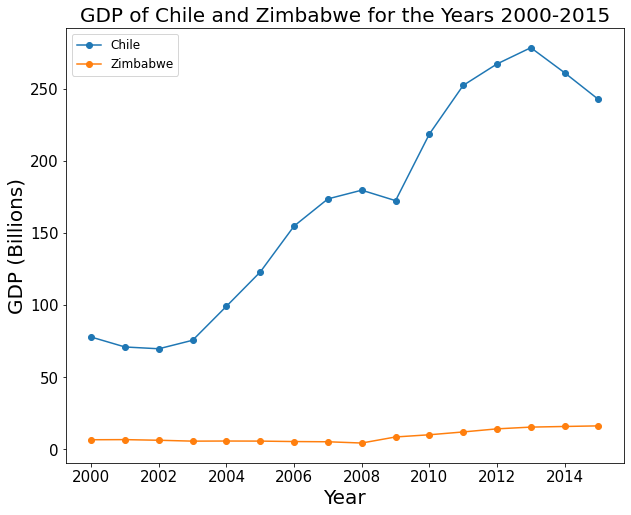

In [5]:
countries = ["Chile", "Zimbabwe"]

plt.figure(figsize = (10, 8))
for country in countries:
    plt.plot(
        le_gdp[le_gdp.country == country].year,
        le_gdp[le_gdp.country == country].gdp_billions,
        marker = "o",
        label = country
    )
plt.xlabel("Year", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("GDP (Billions)", fontsize = 20)
plt.title("GDP of Chile and Zimbabwe for the Years 2000-2015", fontsize = 20)
plt.legend(fontsize = 12)
plt.show()

From the above visualizations, it is easy to see that the U.S. dominates this group in terms of GDP for each of the 15 years studied. China, however, is closing the gap. The other countries appear to have their GDP plateau after the recovery from the 2008 financial crisis.

### 2.3 Life Expectancy Vs. GDP

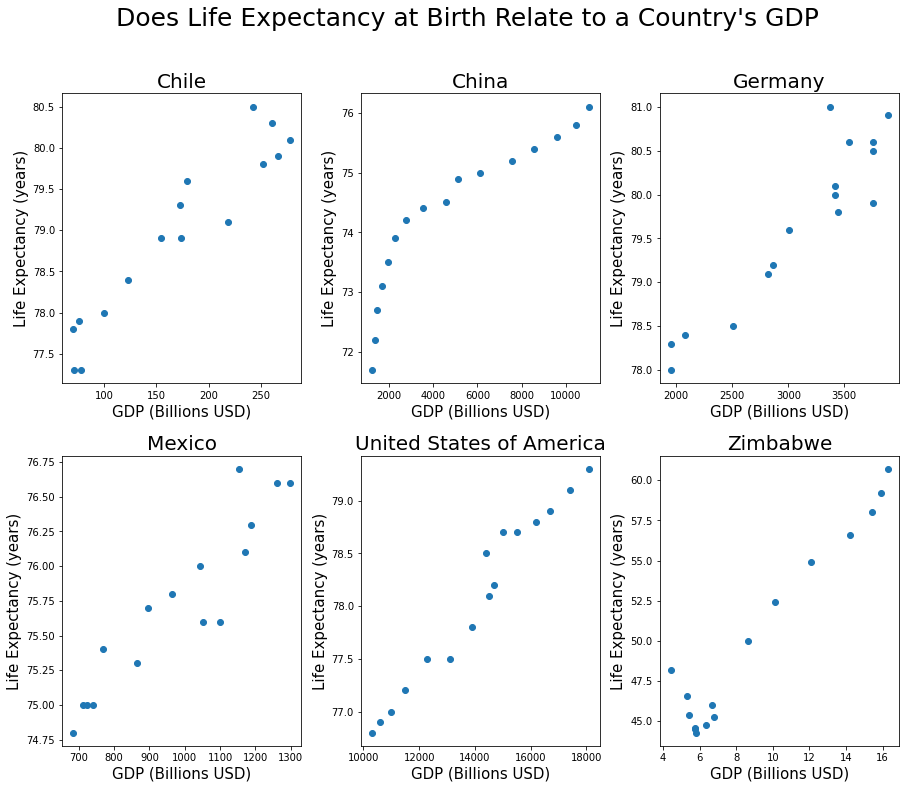

In [40]:
fig, axs = plt.subplots(2, 3, figsize = (15, 12))

for i in range(len(le_gdp.country.unique())):
    if i <= 2:
        axs[0, i].scatter(
            x = le_gdp[le_gdp.country == le_gdp.country.unique()[i]].gdp_billions,
            y = le_gdp[le_gdp.country == le_gdp.country.unique()[i]].le_years
        )
        axs[0, i].set_xlabel("GDP (Billions USD)", fontsize = 15)
        axs[0, i].set_ylabel("Life Expectancy (years)", fontsize = 15)
        axs[0, i].set_title(le_gdp.country.unique()[i], fontsize = 20)
    else:
        axs[1, i - 3].scatter(
            x = le_gdp[le_gdp.country == le_gdp.country.unique()[i]].gdp_billions,
            y = le_gdp[le_gdp.country == le_gdp.country.unique()[i]].le_years
        )
        axs[1, i - 3].set_xlabel("GDP (Billions USD)", fontsize = 15)
        axs[1, i - 3].set_ylabel("Life Expectancy (years)", fontsize = 15)
        axs[1, i - 3].set_title(le_gdp.country.unique()[i], fontsize = 20)

plt.subplots_adjust(wspace = 0.25, hspace = 0.25)
plt.suptitle("Does Life Expectancy at Birth Relate to a Country's GDP", fontsize = 25)
plt.show()

It is clear that there is some relationship between increasing GDP and increasing life expectancy at birth. However, the minutiae of the relationship can not be descerned with this dataset. This is most evident in the cases Zimbabwe and China. For Zimbabwe, a 2008 Reuters article suggests many reasons for this decline in life exectancy, including inflation, prevalence of HIV/AIDS and an increase in child mortality. 

China shows a very sharp increase in life expectancy as a function of GDP until they reach about 3000 billion USD. The slope decreases beyond that suggesting diminishing returns on life expectancy as a function of increasing GDP.

Germany, likewise to China, shows different behaviour when passing the 3000 billion USD GDP threshold. Beyond that point, the life expectancy in Germany appears to be random scatter between ~80 years and ~81 years. This could suggest that humans with have reached the life expectancy ceiling for our biology with the medical technology available in 2015.

Chile, on the other hand has a similar life expectancy as Germany with less than 10% of the GDP. This combined with Mexico having longer life expectancy than China with ~10% of the China's GDP give further evidence that more information is required to fully understand what controls life expectancy.